 # FIT5202 Assignment 1
 **Haichen Wang** <br>
 **29212634**
<br>
 Notice: some cells depends on previous variables. Please run cells one by one downwards to avoid exceptions.

 ## Part A: Analysing Text Data

 ### Step 01: Import `pyspark` and initialize Spark
 Write the code to create a `SparkContext` object, which tells Spark how to access a cluster. To create a `SparkContext` you first need to build a `SparkConf` object that contains information about your application. Give an appropriate name for your application and run Spark locally with as many working processors as logical cores on your machine.

In [1]:
# import pyspark and initialize Spark
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

sc = SparkContext.getOrCreate()

if (sc is None):
    sc = SparkContext(master="local[*]", appName="Assignment 1 Part A")
spark = SparkSession(sparkContext=sc)

 ### Step 02: Create Resilient Distributed Datasets (RDDs)
 A ​`SparkContext​` can be used to create Resilient Distributed Datasets (RDDs) on a cluster. Write the code ​in pyspark to read the required dataset and display the total number of lines in each dataset.

In [2]:
# read from text files
rdd_book_1 = sc.textFile('Datasets/Agile Processes  in Software Engineering  and Extreme Programming.txt')
rdd_book_2 = sc.textFile('Datasets/Scrum Handbook.txt')
# count rdd
line_count_1 = rdd_book_1.count()
line_count_2 = rdd_book_2.count()

print('\"Agile Processes in Software Engineering and Extreme Programming\"', "\nTotal lines: %d" %line_count_1)
print()
print('\"Scrum Handbook\"', "\nTotal lines: %d" %line_count_2)

"Agile Processes in Software Engineering and Extreme Programming" 
Total lines: 21569

"Scrum Handbook" 
Total lines: 4617


 ### Step 03: ​Cleaning/Manipulating text
 Write a function that performs the following tasks on the RDDs:
 1. Removes all characters which are not alphabets except space(s).
 2. Changes all upper case letters to lowercase.
 3. Removes all leading or trailing spaces.
Use the python module ​`re` ​for matching patterns. Finally, display the contents of the RDDs after applying the function

In [3]:
# imort regex package, compile a regex pattern for data cleaning
import re
pattern = re.compile("[a-zA-Z ]")
# create a spark broadcast variable
broadcast_pattern = sc.broadcast(pattern)

# function for data cleanning
def clean_text_func(line):
    reg_char = broadcast_pattern.value.findall(line)
    result = "".join(reg_char).lower().strip()
    return result

# clean text and remove empty lines
rdd_reg_book_1 = rdd_book_1.map(clean_text_func).filter(lambda x: x != '')
rdd_reg_book_2 = rdd_book_2.map(clean_text_func).filter(lambda x: x != '')

In [4]:
# display the contect of book 1
rdd_reg_book_1.collect()


['lnbip',
 'i helen sharp',
 'tracy hall eds',
 'agile processes',
 'in software engineering',
 'and extreme programming',
 'th international conference xp',
 'edinburgh uk may',
 'proceedings',
 'springer open',
 'lecture notes',
 'in business information processing',
 'series editors',
 'wil van der aalst',
 'eindhoven technical university eindhoven the netherlands',
 'john mylopoulos',
 'university of trento povo italy',
 'michael rosemann',
 'queensland university of technology brisbane qld australia',
 'michael j shaw',
 'university of illinois urbanachampaign il usa',
 'clemens szyperski',
 'microsoft research redmond wa usa',
 'more information about this series at httpwwwspringercomseries',
 'helen sharp  tracy hall eds',
 'agile processes',
 'in software engineering',
 'and extreme programming',
 'th international conference xp',
 'edinburgh uk may',
 'proceedings',
 'springer open',
 'editors',
 'helen sharp',
 'computing and communications',
 'department',
 'the open univers

In [5]:
# display the contents of book 2
rdd_reg_book_2.collect()


['jeff sutherlands',
 'scrum handbook',
 'everything',
 'you need',
 'to know',
 'to start',
 'a scrum project',
 'in your',
 'organization',
 'scrum',
 'training',
 'institute',
 'm w press',
 'this book is dedicated to nobel laureate muhammad yunus and the',
 'grameen bank for originating microenterprise development and the',
 'accion international presidents advisory board responsible for much of',
 'microenterprise development in the western hemisphere',
 'the strategy for bootstrapping the poor out of poverty has been',
 'a model for freeing hundreds of thousands of software developers from',
 'developer abuse caused by poor management practices',
 'thanks to the reviewers of the text who include among many others',
 'tom poppendieck',
 'hen rick kniberg',
 'rowan bunning',
 'clifford thompson',
 'about this book',
 'this manual is based on the scrum papers published by the scrum',
 'training institute see wwwscrumtraininginstitutecom',
 'for information on how to receive your own

 ### Step 04: Transforming the Data/Counting the words
 Apply a transformation that will split each element of the RDD by its spaces and then create a word pairs for e.g. ('agile', 1), ('handbook', 1).<br>
 Count the frequency of each word and ​display the top 20 most frequent words

In [6]:
# split lines into single words
# use rd.split to remove spaces between words
rdd_word_1 = rdd_reg_book_1.flatMap(lambda x: re.split(r'\s+', x))
rdd_word_2 = rdd_reg_book_2.flatMap(lambda x: re.split(r'\s+', x))

# convert words into (word, 1) pairs and count frequency for each words
rdd_wordpair_1 = rdd_word_1.map(lambda x: (x,1)).reduceByKey(lambda x, y: x + y)
rdd_wordpair_2 = rdd_word_2.map(lambda x: (x,1)).reduceByKey(lambda x, y: x + y)

# sort word pairs by key
rdd_sorted_1 = rdd_wordpair_1.sortBy(lambda x: x[1], ascending=False)
rdd_sorted_2 = rdd_wordpair_2.sortBy(lambda x: x[1], ascending=False)


In [7]:
print('\"Agile Processes in Software Engineering and Extreme Programming\"', "\nTop 20 frequent words: ")
rdd_sorted_1.take(20)

"Agile Processes in Software Engineering and Extreme Programming" 
Top 20 frequent words: 


[('the', 8145),
 ('and', 3965),
 ('of', 3944),
 ('to', 3714),
 ('in', 3076),
 ('a', 2701),
 ('is', 1539),
 ('that', 1355),
 ('for', 1194),
 ('as', 1028),
 ('on', 1015),
 ('we', 975),
 ('with', 969),
 ('software', 922),
 ('this', 915),
 ('are', 784),
 ('agile', 748),
 ('it', 741),
 ('development', 737),
 ('was', 711)]

In [8]:
print('\"Scrum Handbook\"', "\nTop 20 frequent words: ")
rdd_sorted_2.take(20)

"Scrum Handbook" 
Top 20 frequent words: 


[('the', 1238),
 ('of', 537),
 ('and', 534),
 ('to', 477),
 ('a', 451),
 ('scrum', 395),
 ('in', 360),
 ('is', 348),
 ('team', 260),
 ('product', 232),
 ('for', 195),
 ('that', 181),
 ('it', 165),
 ('on', 149),
 ('sprint', 146),
 ('this', 142),
 ('with', 132),
 ('as', 124),
 ('are', 119),
 ('by', 118)]

 ### Step 05: Removing Stop Words
Use `nltk` package to remove the stop words.<br>
Show the amount of unique words in each RDD

In [9]:
# import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
# set stopwords for English
stopwords = set(stopwords.words('english'))
# create a broadcast variable for the stopwords set
broadcast_stopwords = sc.broadcast(stopwords)

# remove stopwords
rdd_no_stopword_1 = rdd_sorted_1.filter(lambda x: x[0] not in broadcast_stopwords.value)
rdd_no_stopword_2 = rdd_sorted_2.filter(lambda x: x[0] not in broadcast_stopwords.value)

unique_words_count_1 = rdd_no_stopword_1.count()
unique_words_count_2 = rdd_no_stopword_2.count()

In [10]:
print('\"Agile Processes in Software Engineering and Extreme Programming\"')
print("Unique words: {}".format(unique_words_count_1))
print()
print('\"Scrum Handbook\"')
print("Unique words: {}".format(unique_words_count_2))

"Agile Processes in Software Engineering and Extreme Programming"
Unique words: 9611

"Scrum Handbook"
Unique words: 2936


 ### Step 06: Find the average occurrence of a word

To find the average occurrence of a word, you will have to find the total number of words and divide that by the number of unique words.

In [11]:
# calcaulate total words (without stopwords)
total_words_1 = rdd_no_stopword_1.map(lambda x: x[1]).reduce(lambda x, y: x+y)
total_words_2 = rdd_no_stopword_2.map(lambda x: x[1]).reduce(lambda x, y: x+y)

In [12]:
# average words occurence (keep results in two digits)
print('\"Agile Processes in Software Engineering and Extreme Programming\"') 
print("Average occurences of a word: {0:.2f}".format(total_words_1/unique_words_count_1))
print()
print('\"Scrum Handbook\"')
print("Average occurences of a word: {0:.2f}".format(total_words_2/unique_words_count_2))

"Agile Processes in Software Engineering and Extreme Programming"
Average occurences of a word: 8.23

"Scrum Handbook"
Average occurences of a word: 3.68


### Step 7: Exploratory data analysis
Q1. Compare the distribution of words in Book1 and Book2 <br>
*Use log scale (base 10) to plot the graph*

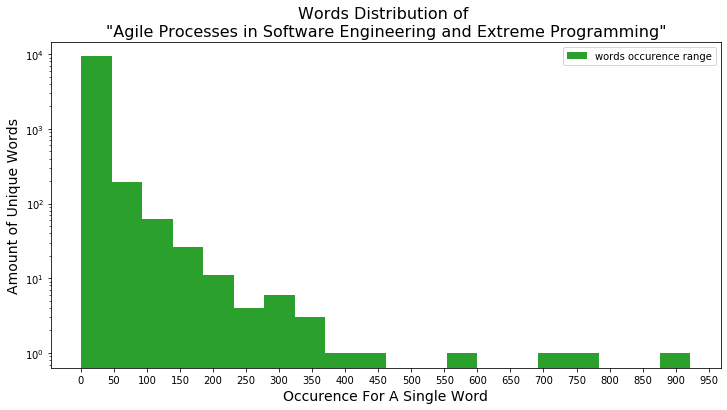

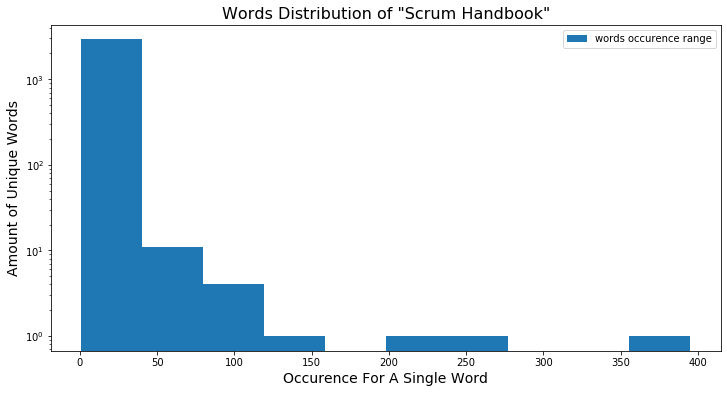

In [16]:
# import matplot for visualization
import matplotlib.pyplot as plt
import numpy as np

# prepare data
# collect counts value from word-count key value pairs
x_1 = rdd_no_stopword_1.values().collect()
x_2 = rdd_no_stopword_2.values().collect()

# plot word distribution of book1
plt.figure(figsize=(12,6))
plt.hist(x_1, bins=20, color='C2', label='words occurence range', log=True)
plt.xticks(range(0, 1000, 50))
plt.title('Words Distribution of \n"Agile Processes in Software Engineering and Extreme Programming"', fontsize=16)
plt.xlabel('Occurence For A Single Word', fontsize=14)
plt.ylabel('Amount of Unique Words', fontsize=14)
plt.legend()
plt.show()

# plot word distribution of book2 
plt.figure(figsize=(12,6))
plt.hist(x_2, color='C0', label='words occurence range', log=True)
plt.title('Words Distribution of "Scrum Handbook"', fontsize=16)
plt.xlabel('Occurence For A Single Word', fontsize=14)
plt.ylabel('Amount of Unique Words', fontsize=14)
plt.legend()
plt.show()

**Analysis** <br>
The two graphs presented above demonstrate words distribution of two books.<br>

The x-axis represents ranges of words occurence. To be specific, for example, the group "0-50" in graph one means words counted within 50 times. And Its value $10^4$ indicates that there are around 10000 unique words in this group. <br>

For the book "Agile Processes in Software Engineering and Extreme Programming", most non-stop unique words (almost 10000) occur less than 50 times. The most frequent word occurs by 900 times.<br>

For the book "Scrum Handbook", words distribution share the same feature. Majority of words occur within 50 times. The most frequent word occurs over 350 times. 

Q2. Compare the top 15 most common words in Book1 and Book2. Plot the graphs and explain your understanding of the graph.

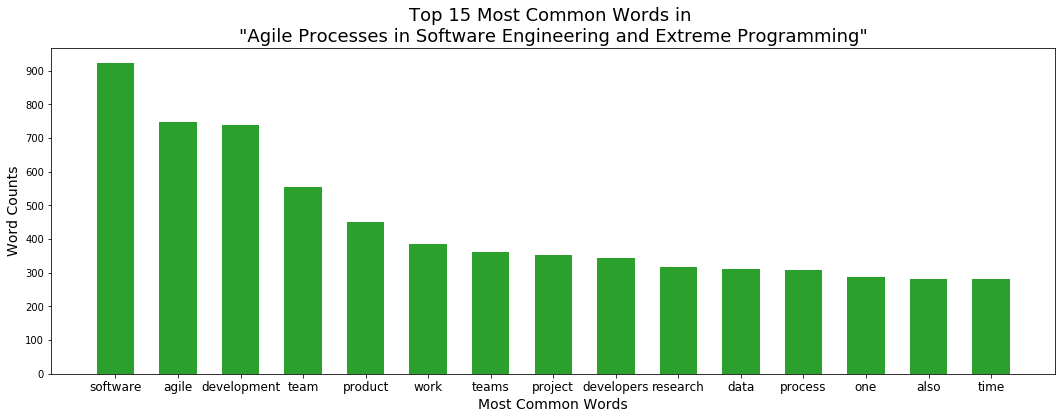

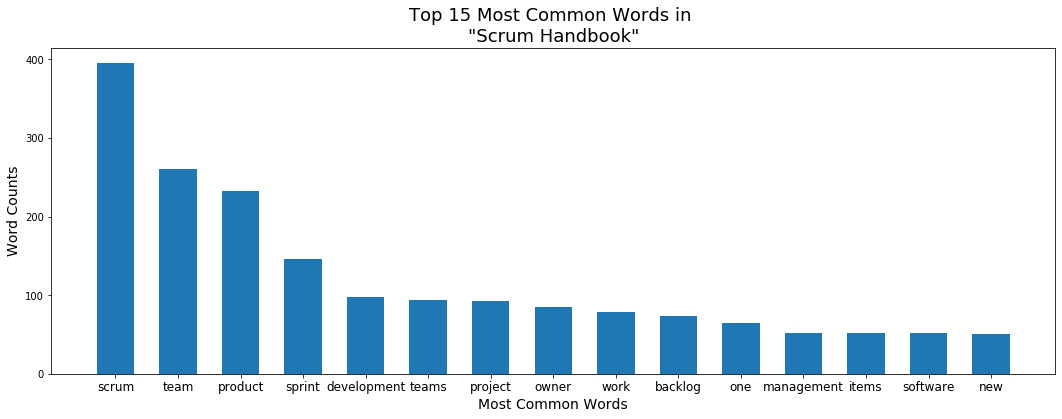

In [17]:
# prepare data
# take words and counts from <word, count> key value pair
words_1 = rdd_no_stopword_1.keys().take(15)
words_2 = rdd_no_stopword_2.keys().take(15)

count_1 = rdd_no_stopword_1.values().take(15)
count_2 = rdd_no_stopword_2.values().take(15)

# plot configuration for book1
plt.figure(figsize=(18,6))
plt.bar(words_1, count_1, width= 0.6, color="C2")
plt.xticks(fontsize=12)
plt.yticks(range(0,1000,100))
plt.title('Top 15 Most Common Words in \n"Agile Processes in Software Engineering and Extreme Programming"',fontsize=18)
plt.xlabel('Most Common Words', fontsize=14)
plt.ylabel('Word Counts', fontsize=14)
plt.show()

# plot configuration for book2
plt.figure(figsize=(18,6))
plt.bar(words_2, count_2, width= 0.6, color="C0")
plt.xticks(fontsize=12)
plt.yticks(range(0,500,100))
plt.title('Top 15 Most Common Words in \n"Scrum Handbook"',fontsize=18)
plt.xlabel('Most Common Words', fontsize=14)
plt.ylabel('Word Counts', fontsize=14)
plt.show()

**Analysis**<br>
In the book "Agile Processes in Software Engineering and Extreme Programming", the top 3 most common words are "software", "agile" and "development", counted around 900, 750 and 750 respectively. <br>

Other top 15 common words are: "team", "product", "work", "teams", "project", "developers", "research", "data", "process", "one", "also" and "time". <br>
However, when calculate "team" and "teams" together, this word accounts for about 900 and then will almost be as common as "software".<br>

For "Scrum Handbook", the top 3 most common words take nearly half of the total word occurence when summed up. The most common word is "scrum" with the occurence of 400, followed by "team" as 260 and "prodcut" as 240. <br>

Other common words are: "sprint", "development", "teams", "project", "owner", "work", "backlog", "one", "magagement", "items", "software" and "new".